# Minimum fare

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Assumptions - General
trips_per_month = 70000
avg_fare = 3.50

#Assumptions - Cabify
px_km = 0.50
px_min = 0
min_fare = 2.50

#Assumptions - Uber
px_km_u = 0.28
px_min_u = 0.06
min_fare_u = 1.20

In [3]:
#find average distance per trip
avg_distance = avg_fare/px_km
print(avg_distance)

#find max trip distance
md = 50/0.50
print(md)

7.0
100.0


In [4]:
# Generate random monthly trips (by distance, in km) with right skewed distribution
import scipy.stats
from math import sqrt
distribution = scipy.stats.gengamma(0.076,2.1, loc=0.75, scale=25)
sample = distribution.rvs(size=trips_per_month)

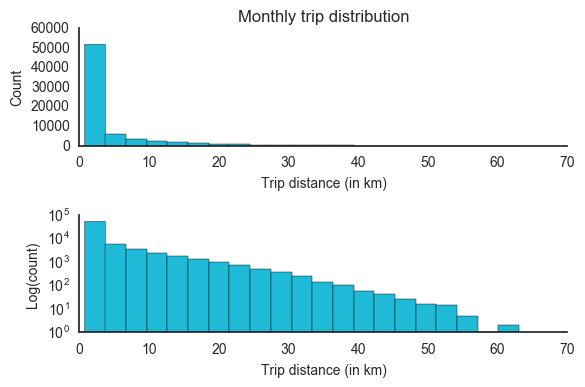

      TRIP STATS IN KM: 

      Mean trip distance: 3.93
      Kurtosis: 10.04
      Trip stdev: 6.21
      Min trip distance: 0.75 
      Max trip distance: 63.08
      Trips under mean distance: 75%


In [5]:
# Plot trip distribution and print statistics
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(6, 4))
sns.set_style("white", {'axes.grid' : False})          # <<<<<< format

plt.subplot(2,1,2)
plt.title('   ')
plt.ylabel('Log(count)', fontsize=10)
plt.hist(sample, bins=21, log=True, color='#1FBAD8')
sns.despine(left=False, bottom=False)
plt.xlabel('Trip distance (in km)', fontsize=10)

plt.subplot(2,1,1)
plt.title('Monthly trip distribution')
plt.ylabel('Count', fontsize=10)
plt.hist(sample, bins=21, log=False, color='#1FBAD8')
sns.despine(left=False, bottom=False)
plt.xlabel('Trip distance (in km)', fontsize=10)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,y1,y2))

plt.tight_layout()
plt.show()

# print(distribution.stats('mvsk'))
print("      TRIP STATS IN KM: \n")
print("      Mean trip distance:",round(float(distribution.stats('mvsk')[0]), 2))
print("      Kurtosis:",round(float(distribution.stats('mvsk')[3]), 2))
print("      Trip stdev:",round(sqrt(distribution.stats('mvsk')[1]), 2))
print("      Min trip distance:", round(min(sample), 2), "\n","     Max trip distance:", round(max(sample), 2))
print("      Trips under mean distance:",
      "{:.0%}".format(round(len(sample[sample <= distribution.stats('mvsk')[0]])/trips_per_month, 2)))

In [6]:
# Convert trip month sample to list
random_monthly_trips = list(sample)

In [7]:
normal_speed = 40
traffic_speed = 5

def speed(x):
    
    if x <= .8:
        return normal_speed
    else:
        return traffic_speed

def adjusted_fare(real, base):
    if real < base:
        return base
    else:
        return real

In [8]:
#Generate a random driver day, in trips
import random
single_sample = random.sample(random_monthly_trips,  12)
single_sample

[11.809852668693217,
 10.752187114427471,
 13.12526348711021,
 0.75011737897257547,
 1.4187365563757837,
 23.726955116553661,
 9.9203765636784382,
 5.8519593575102293,
 0.75000906063338513,
 4.8844819960271106,
 18.304283819660039,
 0.75]

In [9]:
daily_active_drivers = 200
trips_per_driver_day = 12
trial_days = 30

charged_fares = []
real_fares = []
base_benefits = []

# Simulate X day's worth of trips @ an avg. X daily drivers & @ an avg. X trips/driver/day

for driver_days in range(daily_active_drivers * trial_days):
    
    driver_charged_fares = 0
    driver_real_fares = 0
    driver_base_benefit = 0

    trip_sample = random.sample(random_monthly_trips,  trips_per_driver_day)
    
    for trip in trip_sample:
        px_per_km = 0.50
        px_per_min = 0.00
        base_fare = 2.50

        trip_distance = trip
        trip_time = (trip_distance / speed(random.uniform(0, 1))) * 60
        real_trip_fare = (trip_distance * px_per_km) + (trip_time * px_per_min)

        #adjust fares for minimum
        charged_fare = adjusted_fare(real_trip_fare, base_fare)    

        #find the benefit of implementing a base fare
        base_benefit = charged_fare - real_trip_fare

        driver_charged_fares += charged_fare
        driver_real_fares += real_trip_fare
        driver_base_benefit += base_benefit
        
    charged_fares.append(driver_charged_fares)
    real_fares.append(driver_real_fares)
    base_benefits.append(driver_base_benefit)

In [10]:
print(np.mean(charged_fares), np.mean(real_fares), np.mean(base_benefits), np.std(base_benefits))

41.0371903503 23.839724992 17.1974653583 3.06816350169


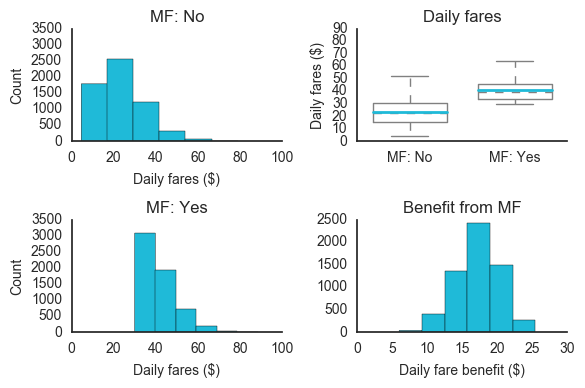

In [38]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6, 4))

meanlineprops = dict(linestyle='-', linewidth=2, color='#1FBAD8')
medianprops = dict(linestyle='--', linewidth=1, color='grey')

plt.subplot(2,2,1)
plt.title('MF: No')
plt.ylabel('Count', fontsize=10)
plt.hist((real_fares), bins= 6, color='#1FBAD8')
sns.despine(left=False, bottom=False)
plt.xlabel('Daily fares ($)', fontsize=10)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,y1,3500))

plt.subplot(2,2,2)
plt.title('Daily fares')
plt.ylabel('Daily fares ($)', fontsize=10)
bp = plt.boxplot([real_fares, charged_fares], 
                 labels=list(["MF: No","MF: Yes"]), showmeans=True, meanline=True, meanprops=meanlineprops, 
                 medianprops=medianprops, widths=(0.7, 0.7))
plt.setp(bp['boxes'], color='grey')
plt.setp(bp['whiskers'], color='grey')
plt.setp(bp['caps'], color='grey')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
sns.despine(left=False, bottom=False)

plt.subplot(2,2,3)
plt.title('MF: Yes')
plt.ylabel('Count', fontsize=10)
plt.hist((charged_fares), bins= 6, color='#1FBAD8')
sns.despine(left=False, bottom=False)
plt.xlabel('Daily fares ($)', fontsize=10)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,y1,3500))

plt.subplot(2,2,4)
plt.title('Benefit from MF')
plt.hist((base_benefits), bins= 6, color='#1FBAD8')
sns.despine(left=False, bottom=False)
plt.xlabel('Daily fare benefit ($)', fontsize=10)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,y1,y2))

plt.tight_layout()
plt.show()

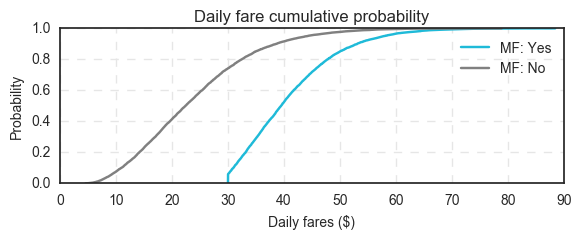

In [12]:
arr1 = np.array(charged_fares)
arr2 = np.array(real_fares)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6.5, 2))
plt.title('Daily fare cumulative probability')
plt.ylabel('Probability', fontsize=10)
a, = plt.plot(np.sort(arr1), np.linspace(0, 1, len(arr1), endpoint=False), color="#1FBAD8", label="MF: Yes")
b, = plt.plot(np.sort(arr2), np.linspace(0, 1, len(arr2), endpoint=False), color="grey", label="MF: No")
plt.xlabel('Daily fares ($)', fontsize=10)
plt.grid(b=True, which='both', color='0.9',linestyle='--')
plt.xticks(np.arange(0, max(charged_fares)+10, 10))
plt.legend(handles=[a,b])
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

plt.show()

--------------------------
# Distance + Time

In [13]:
trials = 30

# Time benefit, on a per trip basis
u_driver_fares_ind = []
c_driver_fares_ind = []
time_dif_ind = []
u_speed = []
u_distance = []

# Time benefit, on a daily basis
avg_time_benefit = []

for trial in range(trials):

    daily_active_drivers = 200
    trips_per_driver_day = 12

    u_fares = []
    c_fares = []

    for driver in range(daily_active_drivers):

        u_driver_fares = 0
        c_driver_fares = 0

        trip_sample = random.sample(random_monthly_trips,  trips_per_driver_day)

        for trip in trip_sample:
            
            trip_distance = trip
            trip_speed = speed(random.uniform(0, 1))
            trip_time = (trip_distance / trip_speed) * 60            
            
            #Uber
            px_per_km = 0.50
            px_per_min = 0.05
            base_fare = 0
            min_fare = 2.50
            
            real_trip_fare = (trip_distance * px_per_km) + (trip_time * px_per_min) + base_fare
            charged_fare_u = adjusted_fare(real_trip_fare, min_fare)

            u_driver_fares += charged_fare_u
            u_driver_fares_ind.append(charged_fare_u)
            
            u_distance.append(trip_distance)
            u_speed.append(trip_speed)

            #Cabify
            px_per_km = 0.50
            px_per_min = 0
            base_fare = 0
            min_fare = 2.50
            
            real_trip_fare = (trip_distance * px_per_km) + (trip_time * px_per_min) + base_fare
            charged_fare_c = adjusted_fare(real_trip_fare, min_fare)    

            c_driver_fares += charged_fare_c
            c_driver_fares_ind.append(charged_fare_c)
            
            time_dif_ind.append(charged_fare_u - charged_fare_c)

        u_fares.append(u_driver_fares)
        c_fares.append(c_driver_fares)

    avg_time_benefit.append(np.mean(u_fares) - np.mean(c_fares))

In [14]:
ex = 32313
print(u_driver_fares_ind[ex], u_distance[ex], u_speed[ex])

2.5 0.750690988717 40


In [15]:
from scipy.stats import kurtosis
kurtosis(avg_time_benefit)

-0.18378601576863796

In [16]:
print("time difference stats")
print("mean:", np.mean(time_dif_ind), "median:", np.median(time_dif_ind),"max:", max(time_dif_ind))

time_dif_ind_arr = np.asarray(time_dif_ind)
print("% affected:", len(time_dif_ind_arr[time_dif_ind_arr > 0]) / len(time_dif_ind_arr))

print("revenue:",sum(u_driver_fares_ind), sum(c_driver_fares_ind),"dif:", sum(u_driver_fares_ind) - sum(c_driver_fares_ind))

print("mean_fare:",np.mean(u_driver_fares_ind), np.mean(c_driver_fares_ind))

time difference stats
mean: 0.557734300662 median: 0.0 max: 37.371596417
% affected: 0.25829166666666664
revenue: 286659.655046 246502.785399 dif: 40156.8696477
mean_fare: 3.98138409787 3.42364979721


In [17]:
ufares = np.array(u_driver_fares_ind)
cfares = np.array(c_driver_fares_ind)

In [18]:
from scipy.stats import kurtosis
print(kurtosis(ufares), kurtosis(cfares))

26.998010433718665 16.83034050453192


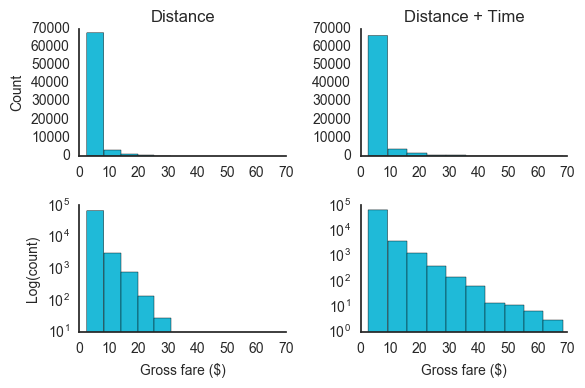

In [19]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(6, 4))
#st = fig.suptitle("Time impact on gross fares", fontsize="large")

ytop = 70 # <<<< CHANGE

plt.subplot(2,2,2)
plt.title('Distance + Time')
plt.hist((ufares), bins=10, color='#1FBAD8')
sns.despine(left=False, bottom=False)

plt.subplot(2,2,1)
plt.title('Distance')
plt.ylabel('Count', fontsize=10)
plt.hist((cfares), bins= 5, color='#1FBAD8')
sns.despine(left=False, bottom=False)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,ytop,y1,y2))

plt.subplot(2,2,4)
plt.hist((ufares), log=True, color='#1FBAD8')
plt.xlabel('Gross fare ($)', fontsize=10)
sns.despine(left=False, bottom=False)

plt.subplot(2,2,3)
plt.ylabel('Log(count)', fontsize=10)
plt.hist((cfares), log=True, bins= 5, color='#1FBAD8')
sns.despine(left=False, bottom=False)
plt.xlabel('Gross fare ($)', fontsize=10)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,ytop,y1,y2))

#st.set_y(1.07)

plt.tight_layout()
plt.show()

In [20]:
print(np.mean(ufares), max(ufares))
print(np.mean(ufares[ufares <= np.mean(ufares)]), len(ufares[ufares <= np.mean(ufares)]) / len(ufares))
print(np.mean(ufares[ufares > np.mean(ufares)]), len(ufares[ufares > np.mean(ufares)]) / len(ufares))
print(sum(ufares))

3.98138409787 68.5145934311
2.55627642741 0.808125
9.98354767411 0.191875
286659.655046


In [21]:
print(np.mean(cfares), max(cfares))
print(np.mean(cfares[cfares <= np.mean(cfares)]), len(cfares[cfares <= np.mean(cfares)]) / len(cfares))
print(np.mean(cfares[cfares > np.mean(cfares)]), len(cfares[cfares > np.mean(cfares)]) / len(cfares))
print(sum(cfares))

3.42364979721 31.1429970141
2.52357364943 0.824375
7.6485623912 0.175625
246502.785399


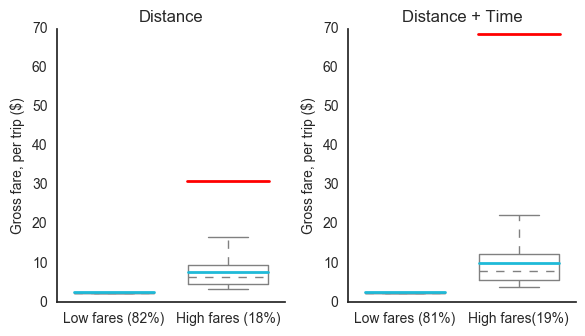

 
       * Low fares <= Mean fare, High fares > Mean fare
      ** Red line = Max value, Teal line = Mean value


In [22]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(6, 3.5))

ytop = 70 # <<<< CHANGE
meanlineprops = dict(linestyle='-', linewidth=2, color='#1FBAD8')
medianprops = dict(linestyle='--', linewidth=1, color='grey')

plt.subplot(1,2,2)
plt.title('Distance + Time')
plt.ylabel('Gross fare, per trip ($)', fontsize=10)
bp = plt.boxplot([ufares[ufares <= np.mean(ufares)], ufares[ufares > np.mean(ufares)]], 
                 labels=list(["Low fares (81%)","High fares(19%)"]), showmeans=True, meanline=True, meanprops=meanlineprops, 
                 medianprops=medianprops, widths=(0.7, 0.7))
plt.setp(bp['boxes'], color='grey')
plt.setp(bp['whiskers'], color='grey')
plt.setp(bp['caps'], color='grey')
plt.axhline(xmin=0.57, xmax=0.93, y=round(max(ufares), 2),c="red",linewidth=2)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,ytop))
sns.despine(left=False, bottom=False)

plt.subplot(1,2,1)
plt.title('Distance')
plt.ylabel('Gross fare, per trip ($)', fontsize=10)
bp = plt.boxplot([cfares[cfares <= np.mean(cfares)], cfares[cfares > np.mean(cfares)]], 
                 labels=list(["Low fares (82%)","High fares (18%)"]), showmeans=True, meanline=True, meanprops=meanlineprops, 
                 medianprops=medianprops, widths=(0.7, 0.7))
plt.setp(bp['boxes'], color='grey')
plt.setp(bp['whiskers'], color='grey')
plt.setp(bp['caps'], color='grey')
plt.axhline(xmin=0.57, xmax=0.93, y=round(max(cfares), 2),c="red",linewidth=2)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,ytop))
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

print(" ")
print("       * Low fares <= Mean fare, High fares > Mean fare")
print("      ** Red line = Max value, Teal line = Mean value")

--------------
# Plotting the 4 types of trips

In [23]:
# Convert all cols to arrays
fare = np.array(c_driver_fares_ind)
distance_value = np.array(u_distance)
speed_value = np.array(u_speed)

In [24]:
print(sum(u_driver_fares_ind), sum(ufares))

286659.655046 286659.655046


In [25]:
df = pd.DataFrame({'distance_value':distance_value, 'speed_value':speed_value, 'fare':fare})
df = df[['distance_value','speed_value','fare']]

In [26]:
df[ex:ex+1]

,distance_value,speed_value,fare
32313,0.750691,40,2.5


In [27]:
df['distance'] = df['distance_value'].apply(lambda x: "short" if x <= round(float(distribution.stats('mvsk')[0]), 2) else "long")
df['speed'] = df['speed_value'].apply(lambda x: "normal" if x == normal_speed else "slow")

In [28]:
df['trip_type'] = df['distance'] + str('-') + df['speed']

In [29]:
df.sample(n=5)

,distance_value,speed_value,fare,distance,speed,trip_type
61945,0.761190,40,2.500000,short,normal,short-normal
18079,0.849455,40,2.500000,short,normal,short-normal
33803,6.831496,40,3.415748,long,normal,long-normal
49554,5.193900,40,2.596950,long,normal,long-normal
48998,0.750000,40,2.500000,short,normal,short-normal


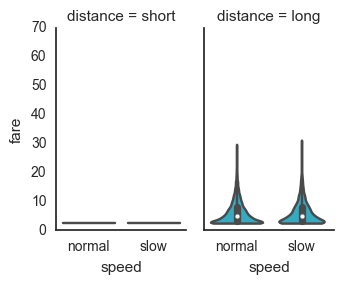

In [30]:
g = sns.FacetGrid(df, col="distance", size=3, aspect=0.6, sharey=True, ylim=(0,70))
g.map(sns.violinplot, "speed", "fare", cut=0, color='#1FBAD8', scale='area')


#sns.boxplot(x="trip_type", y="fare", data=df)
plt.show()

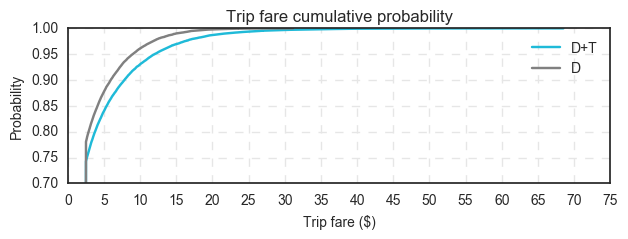

In [31]:
arr1 = np.array(np.array(u_driver_fares_ind))
arr2 = np.array(np.array(c_driver_fares_ind))

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7, 2))
plt.title('Trip fare cumulative probability')
plt.ylabel('Probability', fontsize=10)
a, = plt.plot(np.sort(arr1), np.linspace(0, 1, len(arr1), endpoint=False), color="#1FBAD8", label="D+T")
b, = plt.plot(np.sort(arr2), np.linspace(0, 1, len(arr2), endpoint=False), color="grey", label="D")
plt.xlabel('Trip fare ($)', fontsize=10)
plt.grid(b=True, which='both', color='0.9',linestyle='--')
plt.xticks(np.arange(0, max(arr1)+10, 5))
plt.legend(handles=[a,b])
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,.7,y2))

plt.show()